In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [8]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')
display(cacao.head(10))

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [10]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [11]:
cacao.describe()

,Bar id,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,898.000000,1035.904735,2012.325348,3.422981
std,518.316184,552.886365,2.927210,1.750584
min,1.000000,5.000000,2006.000000,1.000000
25%,449.500000,576.000000,2010.000000,3.000000
50%,898.000000,1069.000000,2013.000000,3.250000
75%,1346.500000,1502.000000,2015.000000,3.500000
max,1795.000000,1952.000000,2017.000000,19.750000


# 2.3. Первичный анализ данных в столбцах. Часть I

In [21]:
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

In [20]:
cacao.rename(columns={'Bar id' : 'bar_id',
                      'Company \n(Maker-if known)' : 'company',
                      'Specific Bean Origin\nor Bar Name' : 'specific_origin',
                      'REF' : 'ref',
                      'Review\nDate' : 'review_date',
                      'Cocoa\nPercent' : 'cocoa_percent',
                      'Company\nLocation' : 'company_location',
                      'Rating' : 'rating',
                      'Bean\nType' : 'bean_type',
                      'Broad Bean\nOrigin' : 'broad_origin'}, 
             inplace=True)

1795


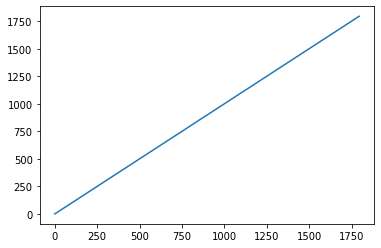

In [24]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [25]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

# Company

In [27]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
Manifesto Cacao,1
Chocablog,1
Rain Republic,1
Durand,1


In [40]:
cacao['company'].unique()


array(['A. Morin', None, 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'AMMA', 'Anahata', 'Animas',
       'Ara', 'Arete', 'Artisan du Chocolat',
       'Artisan du Chocolat (Casa Luker)', 'Askinosie', 'Bahen & Co.',
       'Bakau', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Beau Cacao',
       'Beehive', 'Belcolade', 'Bellflower', 'Belyzium', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao de Origen',
       'Cacao de Origin', 'Cacao Hunters', 'C

In [42]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Park 75,1
Manifesto Cacao,1
Chocablog,1
Rain Republic,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [4]:
def count_genres(genres_series_list):
    cnt = Counter()
    for genre_list in genres_series_list:
        for genre in genre_list:
            cnt[genre] += 1
    return cnt


answers = {} # создадим словарь для ответов

# тут другие ваши предобработки колонок например:
data['profit'] = data['revenue'] - data['budget']
data["cast"] = data["cast"].apply(lambda x : x.split("|"))
data["genres"] = data["genres"].apply(lambda x : x.split("|"))
data["director"] = data["director"].apply(lambda x : x.split("|"))
data["production_companies"] = data["production_companies"].apply(lambda x : x.split("|"))
data["release_date"] = data["release_date"].apply(lambda x : x.split("/"))


#the time given in the dataset is in string format.
#So we need to change this in datetime format
# ...

# 1. У какого фильма из списка самый большой бюджет?

In [5]:
max_budget_df = data[data.budget == data['budget'].max()]
film_name = max_budget_df['original_title'].iloc[0]
film_id = max_budget_df['imdb_id'].iloc[0]
result = "{} {}".format(film_name,film_id)

answers['1'] = result

# 2. Какой из фильмов самый длительный (в минутах)?

In [6]:
max_runtime_df = data[data.runtime == data['runtime'].max()]
film_name = max_runtime_df['original_title'].iloc[0]
film_id = max_runtime_df['imdb_id'].iloc[0]
result = "{} {}".format(film_name,film_id)

answers['2'] = result

# 3. Какой из фильмов самый короткий (в минутах)?





In [7]:
min_runtime_df = data[data.runtime == data['runtime'].min()]
film_name = min_runtime_df['original_title'].iloc[0]
film_id = max_runtime_df['imdb_id'].iloc[0]
result = "{} {}".format(film_name,film_id)

answers['3'] = result

# 4. Какова средняя длительность фильмов?


In [8]:
mean_film_runtime = data['runtime'].mean()

answers['4'] = round(mean_film_runtime)

# 5. Каково медианное значение длительности фильмов? 

In [9]:
median_film_runtime = data['runtime'].median()

answers['5'] = round(median_film_runtime)

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [10]:
max_profit_df = data[data.profit == data['profit'].max()]
film_name = max_profit_df['original_title'].iloc[0]
film_id = max_profit_df['imdb_id'].iloc[0]
result = "{} {}".format(film_name,film_id)

answers['6'] = result 

# 7. Какой фильм самый убыточный? 

In [11]:
min_profit_df = data[data.profit == data['profit'].min()]
film_name = min_profit_df['original_title'].iloc[0]
film_id = min_profit_df['imdb_id'].iloc[0]
result = "{} {}".format(film_name,film_id)

answers['7'] = result 

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [12]:
paid_off_df = data.query("revenue > budget")

answers['8'] = len(paid_off_df)

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [13]:
in2008_df = data.query("release_year == 2008")
max_df = in2008_df[in2008_df.profit == in2008_df['profit'].max()]

film_name = max_df['original_title'].iloc[0]
film_id = max_df['imdb_id'].iloc[0]
result = "{} {}".format(film_name,film_id)

answers['9'] = result

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [14]:
in2012_2014_df = data.query("2012 <= release_year <= 2014")
min_df = in2012_2014_df[in2012_2014_df.profit == in2012_2014_df['profit'].min()]

film_name = min_df['original_title'].iloc[0]
film_id = min_df['imdb_id'].iloc[0]
result = "{} {}".format(film_name,film_id)

answers['10'] = result

# 11. Какого жанра фильмов больше всего?

In [15]:
raw_genres = data["genres"]
counter = count_genres(raw_genres.to_list())

answers['11'] = counter.most_common(1)[0][0]

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [35]:
exploded = data.explode("genres")
data_profit = exploded.query("profit > 0")
genres_profit = data_profit.groupby(["genres"]).sum()
max_profit_genres = genres_profit["profit"].sort_values(ascending = False)
answers['12'] = max_profit_genres.index[0]

answers['12']

'Adventure'

# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [17]:
director_expoloded = data.explode("director")
positive_profit = director_expoloded.query("profit > 0")
director_profit = positive_profit.groupby(["director"]).sum()
max_profit_directors = director_profit["profit"].sort_values(ascending = False)

answers['13'] = max_profit_directors.index[0]

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [18]:
genres_exploded = data.explode("genres")
action_genre = genres_exploded.query("genres == \"Action\"")
directors_explode = action_genre.explode("director")
directors = directors_explode["director"].value_counts()

answers['14'] = directors.index[0]

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [19]:
actors_exploded = data.explode("cast")
in_2012 = actors_exploded.query("release_year == 2012 & profit > 0")
profit_actors = in_2012.groupby(["cast"]).sum()['profit'].sort_values(ascending = False).head(5)

answers['15'] = profit_actors.index[0]

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?
Примечание: в фильмах, где бюджет выше среднего по данной выборке.

In [20]:
actors_exploded = data.explode("cast")
mean_budget = actors_exploded["budget"].mean()
above_mean_budget = actors_exploded[actors_exploded.budget > mean_budget]
actors = above_mean_budget["cast"].value_counts().head(5)

answers['16'] = actors.index[0]

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [21]:
actors_exploded = data.explode("cast")
nicolas = actors_exploded.query("cast == \"Nicolas Cage\"")
nicolas_genres = nicolas.explode("genres")["genres"].value_counts().head(5)

answers['17'] = nicolas_genres.index[0]

# 18. Самый убыточный фильм от Paramount Pictures

In [22]:
companies = data.explode("production_companies")
paramount = companies.query("production_companies == \"Paramount Pictures\"")
paramount_films = paramount.sort_values('profit').head()

film_name = paramount_films['original_title'].iloc[0]
film_id = paramount_films['imdb_id'].iloc[0]

answers['18'] = "{} ({})".format(film_name,film_id)

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [23]:
years_revenue = data.groupby(["release_year"]).sum()
sort = years_revenue.sort_values("revenue", ascending = False).head(5)

answers['19'] = sort.index[0]

# 20. Какой самый прибыльный год для студии Warner Bros?

In [24]:
companies = data.explode("production_companies")
warner = companies[companies.production_companies.str.contains("Warner")]
years_profit = warner.groupby(["release_year"]).sum()
sort = years_profit.sort_values("profit", ascending = False).head(5)

answers['20'] = sort.index[0]

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [25]:
movies = data
movies["month"] = movies["release_date"].apply(lambda x: x[0]) 
movies_pivot = movies.pivot_table(columns = "month", index = "original_title", values = "imdb_id",
                                 aggfunc = "count", fill_value = 0)
months = movies_pivot.sum().sort_values(ascending=False).head(3)

answers['21'] = months.index[0]

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [26]:
movies = data
movies["month"] = movies["release_date"].apply(lambda x: x[0])
summer = movies[movies["month"].isin(["6", "7", "8"])]

answers['22'] = len(summer["month"])

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [27]:
directors_explode = data.explode("director")
directors_explode["month"] = directors_explode["release_date"].apply(lambda x: x[0])
winter = directors_explode[directors_explode["month"].isin(["12", "1", "2"])]
directors = winter["director"].value_counts().head(5)

answers['23'] = directors.index[0]

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [28]:
companies = data.explode("production_companies")
companies["title_len"] = companies["original_title"].apply(lambda title: len(title))
max_title = companies.query("title_len == title_len.max()")

answers['24'] = max_title["production_companies"].iloc[1]

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [29]:
companies = data.explode("production_companies")
companies["overview_words"] = companies["overview"].str.split().apply(len)
mean = companies.groupby("production_companies")["overview_words"].mean().sort_values().tail(1)

answers['25'] = mean.index[0]

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [30]:
one_percent = data.sort_values('vote_average').tail(int(data.original_title.count()/100)).original_title
answers['26'] = one_percent.tolist()

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [31]:
raw_df = pd.read_csv('movie_bd_v5.csv')
raw_df['cast'] = raw_df['cast'].str.split('|')
cast_df = raw_df['cast'].reset_index()
cast_df['pairs'] = cast_df['cast'].apply(lambda cast_list: list(combinations(cast_list, 2)))
exploded_pairs = cast_df.explode('pairs').reset_index()

answers['27'] = Counter(exploded_pairs['pairs']).most_common(1)[0][0]

# Submission

In [32]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': 'Pirates of the Caribbean: On Stranger Tides tt1298650',
 '2': 'Gods and Generals tt0279111',
 '3': 'Winnie the Pooh tt0279111',
 '4': 110,
 '5': 107,
 '6': 'Avatar tt0499549',
 '7': 'The Lone Ranger tt1210819',
 '8': 1478,
 '9': 'The Dark Knight tt0468569',
 '10': 'The Lone Ranger tt1210819',
 '11': 'Drama',
 '13': 'Peter Jackson',
 '14': 'Robert Rodriguez',
 '15': 'Chris Hemsworth',
 '16': 'Matt Damon',
 '17': 'Action',
 '18': 'K-19: The Widowmaker (tt0267626)',
 '19': 2015,
 '20': 2014,
 '21': '9',
 '22': 450,
 '23': 'Peter Jackson',
 '24': 'Four By Two Productions',
 '25': 'Midnight Picture Show',
 '26': ['The Theory of Everything',
  'The Lord of the Rings: The Two Towers',
  'There Will Be Blood',
  'Mr. Nobody',
  '12 Years a Slave',
  'The Pianist',
  'Gone Girl',
  'Memento',
  'Guardians of the Galaxy',
  'Inception',
  'The Wolf of Wall Street',
  'The Grand Budapest Hotel',
  'The Lord of the Rings: The Return of the King',
  'Room',
  'Interstellar',
  'Inside Out',


In [33]:
len(answers)

26